<a href="https://colab.research.google.com/github/Saku052/GooglePlayAnalysis/blob/main/PlayWeightAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relationship of elements, installs and rating in a game.

## Introduction
components in a application game such as attached mini games and long story modes are huge element which form a game. 

From this fact, I formed a hypothesis. 



> More elements in a game the better. 

This simply means that if the game has long story and more components to it, the game will get better reviews and installs compared to a small game. 

#### Quantify components in a game. 
To make this possible, I have simply borrowed a dataset with size of the app.

To quantify components more accurately, counting the number of words in a story will be better. However, this method is not relistic as collecting the data from each application just takes too much time. 



## Library

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import scipy.stats as st

## Processing data

In [ ]:
df = pd.read_csv("googleplaystore.csv")
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


Cleaning data

In [ ]:
# Drop irrelevant columns
df = df.drop(["Type", "Price", "Content Rating", "Last Updated", "Current Ver", "Android Ver"], axis = 1)
# Convert non float value to float
df["Reviews"] = pd.to_numeric(df["Reviews"], errors = "coerce")
df["Size"] =  pd.to_numeric(df["Size"].str.strip('M'), errors = "coerce")
df["Installs"] = df["Installs"].str.replace(',', '')
df["Installs"] =  pd.to_numeric(df["Installs"].str.strip('+'), errors = "coerce")
# clear all null values
df = df.dropna()


In [ ]:
# Retrive data where the category is game
# Remove Category column
Game_df = df[df["Category"] == "GAME"]
Game_df = Game_df.drop(["Category"], axis = 1)
Game_df.tail(3)

,App,Rating,Reviews,Size,Installs,Genres
10793,Sid Story,4.4,28510.0,78.0,500000.0,Card
10803,Fatal Raid - No.1 Mobile FPS,4.3,56496.0,81.0,1000000.0,Action
10804,Poker Pro.Fr,4.2,5442.0,17.0,100000.0,Card


#### Check the normality of reviews and decide the amount of reviews needed to take into account

analysing all the rating could mess up the analysis. this is due to lack of reliability of some ratings with low reviews.

To solve this problem


> If the number of reviews follow the normal distribution, take out the data lower than 2 standerd distribution will increase the reliability. 



> If the number of reviews does not follow the normal distribution, take out the data on the lower quatile of interquatile range. 







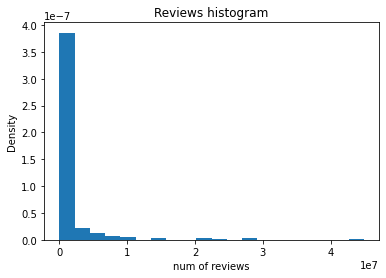

In [ ]:
# Check normality by ploting a histogram for game df
plt.hist(Game_df["Reviews"], density = True, bins = 20)
plt.title("Reviews histogram")
plt.xlabel("num of reviews")
plt.ylabel("Density")
plt.show()

Number of reviews does not follow the normal distribution. Therefore, the best method here is to remove only the first quantile.

In [ ]:
#obtain the first quantile
Reviews_Quantile = Game_df["Reviews"].quantile(0.25)
#Save data frame that has been cleaned
GameClean1_df = Game_df[Game_df["Reviews"] > Reviews_Quantile]
GameClean1_df.count()

App         728
Rating      728
Reviews     728
Size        728
Installs    728
Genres      728
dtype: int64

## Analysing data

Before creating a model for the data, check the relationship of data visually.

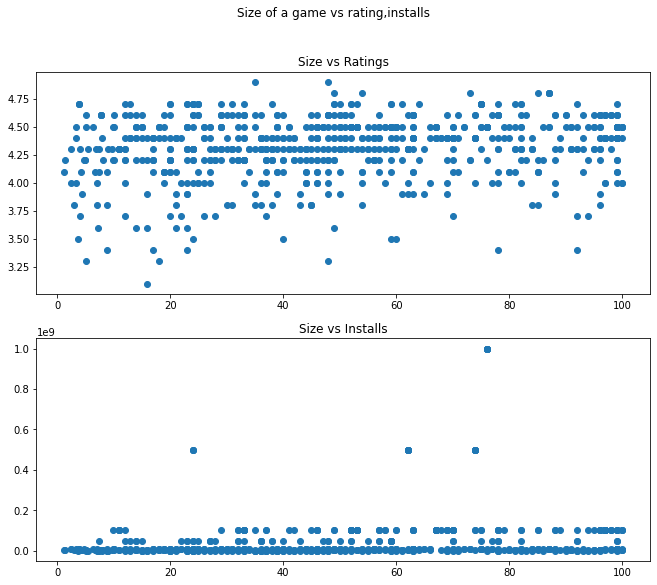

In [ ]:
#Change the figure size
plt.figure(figsize=[11, 9])

#plot title
plt.suptitle("Size of a game vs rating,installs")

# plot1
plt.subplot(2, 1, 1)
plt.scatter(GameClean1_df["Size"], GameClean1_df["Rating"])
plt.title("Size vs Ratings")

#plot2
plt.subplot(2, 1, 2)
plt.scatter(GameClean1_df["Size"], GameClean1_df["Installs"])
plt.title("Size vs Installs")

plt.show()

As the scatter plot does not show any special pattern, no adjustments are needed before modeling.

### modeling data

In [ ]:
model = sm.ols("Size~Rating+Installs", GameClean1_df).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.050    
Dependent Variable: Size             AIC:                6857.0886
Date:               2022-07-09 02:02 BIC:                6870.8595
No. Observations:   728              Log-Likelihood:     -3425.5  
Df Model:           2                F-statistic:        20.15    
Df Residuals:       725              Prob (F-statistic): 3.04e-09 
R-squared:          0.053            Scale:              718.44   
-------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept    -22.1909   15.8961  -1.3960  0.1631  -53.3988   9.0170
Rating        16.4100    3.6750   4.4653  0.0000    9.1951  23.6249
Installs       0.0000    0.0000   4.0104  0.0001    0.0000   0.0000
------------------------------------------------------------------
Omnibus

As the adjusted R squared is less than 0.7 the data has no linear relationships. 

## Report
From the result of ordinary least square model, the elements of a game, ratings and number of install has no linear relationships. 

This answers the Hypothesis "More elements in a game the better." In other words, If the game has long story and more components to it, the game will get better revewis and installs compared to a small game. From this result, the Hypothsis gets rejected. 

This tells us that more elements is not allways better and that small games aren't allways bad. 
